**Algorithms for DNA Sequencing: Programming Homework 1**

In [309]:
def readGenome(filename):
	genome = ''
	with open(filename, 'r') as f:
		for line in f:
			if not line[0] == '>': 
				genome += line.rstrip()
	return genome
genome = readGenome(r"C:\Users\...lambda_virus.fa")
genome[:100] 		#first 100 bases
print("First 100 bases:", genome[:100])

First 100 bases: GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC


In [311]:
def reverseComplement(s):
	complement = {'A': 'T', 'C': 'G', 'G':'C', 'T': 'A', 'N': 'N'}
	t  = ''
	for base in s:
		t = complement[base] + t
	return t
genome_complement= reverseComplement(genome)
print("First 100 bases:", genome_complement[:100]) 

First 100 bases: CGTAACCTGTCGGATCACCGGAAAGGACCCGTAAAGTGATAATGATTATCATCTACATATCACAACGTGCGTGGAGGCCATCAAACCACGTCAAATAATC


**Implement a version of the naive exact matching algorithm that is strand-aware**

In [313]:
def naive(p, t): #p=pattern (ej sequence), t=text (ej genome to compare) 
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

1. How many times does AGGTAGGT or its reverse complement (ACCTACCT) occur in the lambda virus genome? E.g. if AGGTAGGT occurs 10 times and ACCTACCT occurs 12 times, you should report 22.

In [317]:
t = genome
p = "AGGT"
result_genome_AGGT = naive(p, t)
print("Matches:", len(result_genome_AGGT))  

Matches: 150


In [318]:
t = genome
p = "ACCT"
result_genome_ACCT = naive(p, t)
print("Matches:", len(result_genome_ACCT))  

Matches: 156


In [319]:
print("Matches:", len(result_genome_AGGT+result_genome_ACCT))

Matches: 306


2. How many times does TTAA or its reverse complement occur in the lambda virus genome?
Hint: TTAA and its reverse complement are equal, so remember not to double count.

In [321]:
t = genome
p = "TTAA"
result_genome = naive(p, t)
print("Matches:", len(result_genome))  

Matches: 195


3. What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT¿ is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [324]:
t = genome
p = "ACTAAGT"
result_genome = naive(p, t)
print(result_genome)  

[27733, 45382]


In [325]:
t = genome
p = "ACTTAGT"
result_genome = naive(p, t)
print(result_genome)  

[26028]


4. What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?

In [329]:
t = genome
p = "AGTCGA"
result_genome = naive(p, t)
print(result_genome)  

[18005, 23320, 33657, 44806]


In [330]:
reverse=reverseComplement('AGTCGA')
t = genome
p = reverse
result_genome = naive(p, t)
print(result_genome)  

[450, 1908, 2472, 41927, 45369]


5. For Questions 5 and 6, make a new version of the naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. We're looking for approximate matches for P itself, not its reverse complement. For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So naive_2mm (’ACTTTA’, ’ACTTACTTGATAAAGT’) should return the list [0, 4].

In [332]:
def naive_mm(p,s,m): #p=pattern (ej sequence), s=text (ej genome to compare), mismatch 
    occurrences = []
    for i in range(len(s) - len(p) + 1):
        match = True
        mistakes = 0
        for j in range(len(p)):
            if not p[j] == s[i+j]: # find mismatch
                mistakes += 1
                if mistakes > m: # exceed error limits
                    match = False
                    break
        if match:
            occurrences.append(i)
    return occurrences

In [333]:
s = genome
p = "TTCAAGCC"
m = 2
result_genome = naive_mm(p,s,m)
print("Matches:", len(result_genome))

Matches: 191


6. What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [336]:
s = genome
p = "AGGAGGTT"
m = 2
result_genome = naive_mm(p,s,m)
print(result_genome)  

[49, 282, 299, 302, 380, 1560, 1650, 2235, 2277, 2400, 2562, 2565, 2729, 2823, 3160, 3181, 3946, 4210, 4294, 4309, 4405, 4580, 5069, 5159, 5189, 5231, 5331, 5519, 5737, 5882, 5993, 5996, 6011, 6312, 6522, 6585, 6606, 7316, 7394, 7819, 7904, 7966, 7998, 8534, 8648, 8946, 9339, 9354, 9530, 9842, 9966, 10041, 10250, 10416, 10445, 10484, 10527, 10874, 11193, 11292, 11505, 11568, 11655, 11745, 11838, 12078, 12180, 12222, 12697, 12745, 12819, 12880, 12935, 13011, 13087, 13256, 13415, 13526, 13813, 14259, 15385, 15473, 16192, 17101, 17437, 17755, 17936, 17989, 18016, 18040, 18727, 18853, 18911, 19232, 19263, 19310, 19833, 19929, 19932, 19947, 19980, 20793, 20802, 21305, 21528, 21627, 21684, 22414, 22660, 22670, 22787, 23326, 24063, 24145, 24409, 24595, 24681, 25120, 25139, 25210, 25381, 25384, 25648, 25664, 25773, 25987, 26196, 26208, 26576, 26587, 26653, 26736, 27892, 27967, 28042, 28622, 28840, 28976, 29119, 30029, 30530, 30673, 30902, 31619, 31645, 31682, 31843, 31859, 32069, 33180, 33365,

7. Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:
 https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:
Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). 
Accurate and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.



In [338]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() 	#primera linea (nombre de la secuencia y la máquina, etc.) no se guarda
            seq = fh.readline().rstrip() 	#segunda linea, de la secuencia, se guarda
            fh.readline() 	#tercera línea, el signo +, no se guarda
            qual = fh.readline().rstrip()    #linea de calidad. The rstrip() method removes any trailing characters (characters at the end a string)
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq(r"C:\Users\...ERR037900_1.first1000.fastq")  #cambiar por el nombre del archivo
print(seqs[:10])
print(quals[:10])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNAACCTAACCCTAACCCTAACTCTAACCCTAACC', 'ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTANCCCTAACCCTAACCCTAACCCTAACCCTAACCC', 'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC

In [339]:
def phred33ToQ(qual):
	return ord(qual) - 33

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


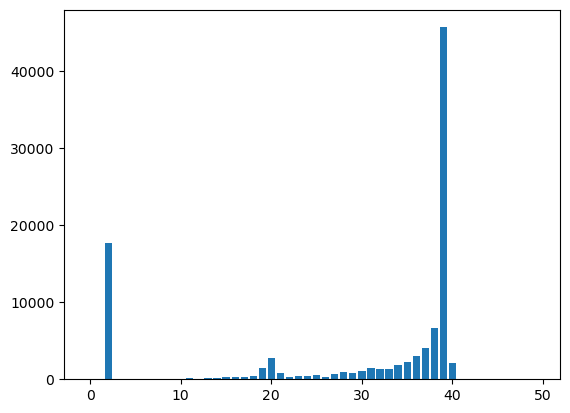

In [341]:
def creaHist(qualities):
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

h = creaHist(quals)
print(h)

%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

Position 66: GC = 0.055 (Low GC)


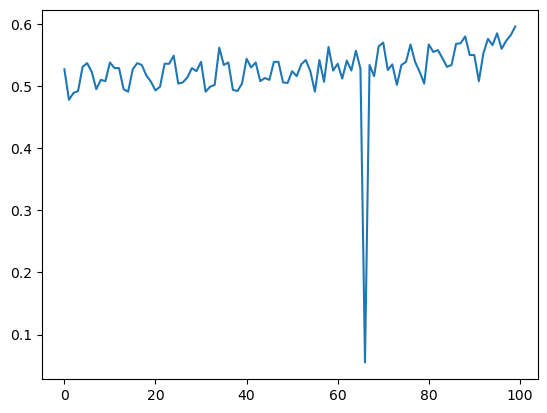

In [416]:
def findGCbyPos(reads):
    gc = [0]*100
    total = [0]*100
    
    for read in reads:
        for i in range (len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            total[i] += 1
    for i in range (len(gc)):
            if total[i] >0:
                gc[i] /= float (total[i])
            if gc[i] < 0.1:
                print(f"Position {i}: GC = {gc[i]} (Low GC)")
    return gc

gc= findGCbyPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

TypeError: '<' not supported between instances of 'list' and 'float'